#Assignment 1

Author : Behrad Binaei Haghighi

In [3]:
from IPython.display import Image

## 1. Explain the mathematical intuition behind the following optimizers used to optimize deep neural networks.

- <b>A. Stochastic Gradient Descent+ Momentum (SGD+ Momentum)</b>
- <b>B. Adagrad</b>
- <b>C. RMSprop</b>


### A. Stochastic Gradient Descent+ Momentum (SGD+ Momentum)

In Stochastic Gradient Descent.

The main idea of SGD is to move <b>against the direction of the slope. </b> to reach the convergence of loss function





$
\theta_{t+1} = \theta_t - \eta \nabla f(\theta_t)
$

- $( \theta_{t+1} )$: Represents the updated parameter values at time \( t+1 \).
- $( \theta_{t} )$: Represents the current parameter values at time \( t \).
- $(\eta)$: Represents the learning rate.
- $( \nabla f(\theta_{t}) )$: Represents the gradient of the loss function \( f \) with respect to the parameters $( \theta_{t} )$.

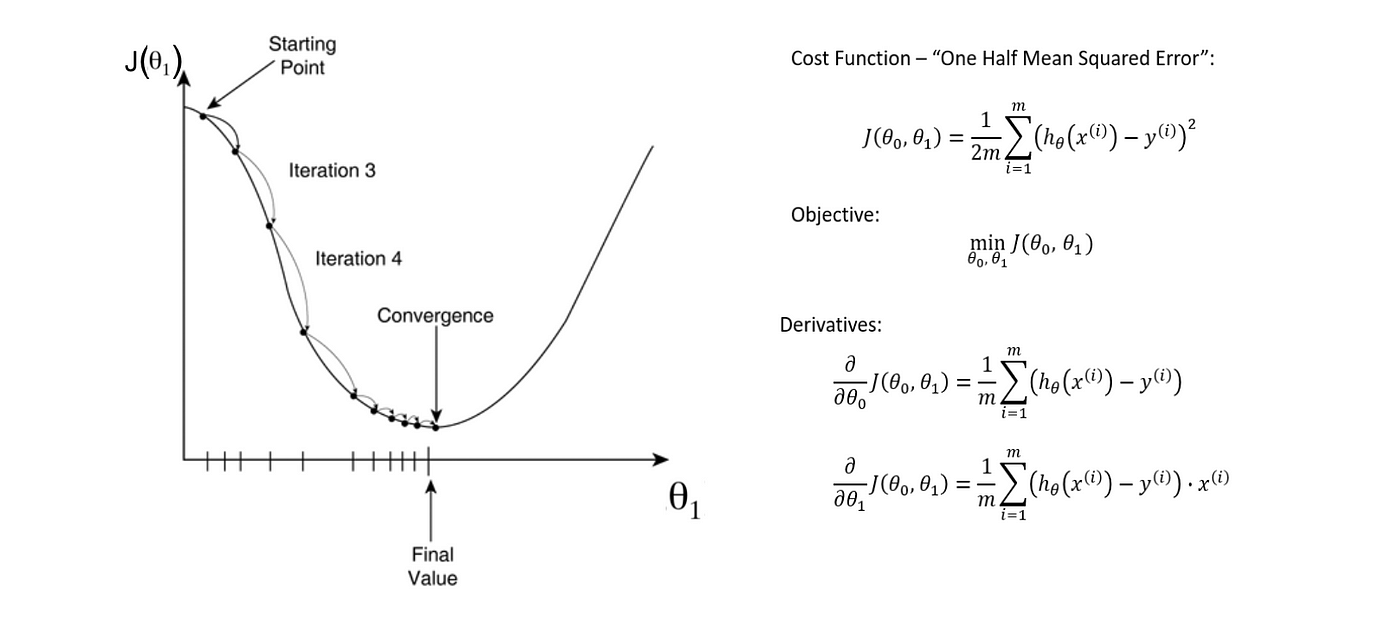

In [4]:
Image(filename="images/sgd_loss.png", width=950,height=500)

<b>What if our loss function have more than one local minimum?</b>

- We have a graph representing our cost function in the neural network,

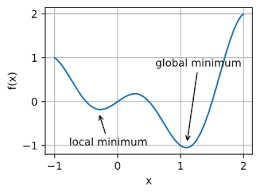

In [5]:
Image(filename="images/local_global_minimum.png", width=950,height=500)

#### How to Avoid Local Minima in Gradient Descent?

 If we use a noisy gradient, a gradient that points in different directions, rather than in one direction, our problem is solved.

 - <u>we can get idea from the momentum in physics.</u>

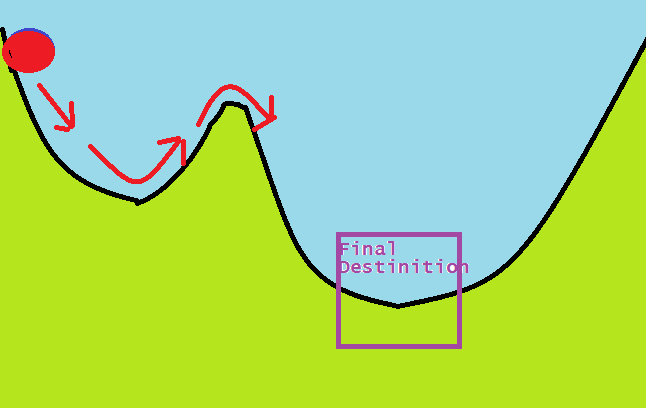

In [6]:
Image(filename="images/momenum_paint.png", width=950,height=500)

Momentum formula:


\begin{align}
v_{t+1} &= \beta \cdot v_t + (1 - \beta) \cdot \nabla J(\theta_t) \\
\theta_{t+1} &= \theta_t - \alpha \cdot v_{t+1}
\end{align}


This guides the update of model parameters, allowing for smoother and faster convergence by reducing oscillations and navigating through local minima more effectively.

### Adaptive Learinig Schedules

Adjusting learning rate is often as important as the actual algorithm. There are number of aspects too consider
- If magnitude of the elearning rate is too large, optimization diveges. If it is too small, it takes too much time to train.

- The rate of decay is important too.

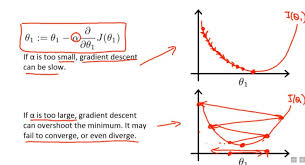

In [8]:
Image(filename="images/high_low_lr.jpg", width=650,height=300)

#### **AdaGrad**

The main idea of Adagrad (Adaptive Gradient Algorithm) is to adapt the learning rate for <b>each parameter</b> based on the historical gradients for that parameter.

This adaptive learning rate adjustment allows Adagrad to make larger updates for infrequent parameters and smaller updates for frequent parameters, potentially improving convergence and training efficiency, especially for sparse data.


1. Update rule for AdaGrad:

$
\
w_{t+1,i} = w_{t,i} - \frac{\eta}{\sqrt{G_{t,ii} + \epsilon}} \cdot \nabla_{w} f(w_t)_i
\
$
2. Accumulation of squared gradients:

$\
G_{t,ii} = G_{t-1,ii} + (\nabla_{w} f(w_t)_i)^2
\
$




- $ w_{t,i}\$ : The i-th component of the weight vector at time step t.

- $(\eta)$ :Learning rate.
- $(\nabla_{w} f(w_t)_i)$ : The gradient of the loss function f with respect to the i-th component of the weight vector at time step t.
- $(G_{t,ii})$ : The accumulated squared gradient for the i-th component of the weight vector up to time step t.
- $(\epsilon)$ : A small value added to the denominator to prevent division by zero.

#### RMSprop

In Adagrad, as you train your model, it keeps track of how much progress it's making for each individual parameter. However, it tends to slow down too much, especially for parameters that have made a lot of progress already. This can happen even if there's still a long way to go before the model is trained well.

RMSprop is a tweak to Adagrad that helps address this issue. Instead of holding onto all the past progress equally, RMSprop pays more attention to recent progress and doesn't let past progress slow things down too much. It's like giving more weight to what's happened recently rather than everything from the past.

Both Adagrad and RMSprop aim to adjust how fast the model learns based on the situation: taking smaller steps when progress is tough and bigger steps when it's easier.

1. Update rule for RMSprop:

$
\
w_{t+1,i} = w_{t,i} - \frac{\eta}{\sqrt{E[G^2]_t + \epsilon}} \cdot \nabla_{w} f(w_t)_i
\
$
2. Accumulation of squared gradients:

$\
E[G^2]_t = \gamma E[G^2]_{t-1} + (1 - \gamma) (\nabla_{w} f(w_t)_i)^2
\
$




- $ w_{t,i}$ : the $i$-th component of the weight vector at time step $t$.

- $\eta$ : learning rate.
- $\nabla_{w} f(w_t)_i$ : gradient of the loss function $f$ with respect to the $i$-th component of the weight vector at time step $t$.
- $E[G^2]_t$ is the exponentially weighted moving average of squared gradients up to time step $t$.
- $\epsilon$ is a small value added to the denominator to prevent division by zero.
- $\gamma$: A hyperparameter (usually sets 0.9)


One of the reasons is that in RMSprop we can decide how much of the past squared gradients we want to affect our effective learning rate. We discussed that parameter $\gamma$: comes in hand for this matter.

$\gamma$: (usually set to 0.9) helps up decide how much of the previous velocity term we want to remember so we don't have to accumulate all the past terms.

## <b>2. Explore the literature and find out which of the above optimizers are preferred in realworld applications. In doing so, you should compare the performance of the above optimizers and address the advantages and disadvantages of each when training neural networks.</b>


In real-world applications, the preference for optimizers among can vary depending on :
- the specific characteristics of the dataset
- the architecture of the neural network, and the training objectives.


So it's always recommended to try different optimizers and see which one works best

#### <b>A. Stochastic Gradient Descent with Momentum (SGD+Momentum):</b>
   - **Advantages**:
     - leading to faster convergence.
     - SGD with Momentum can escape shallow local minima.
     - In general applying momentum helps us to have more **smooth** and **faster** trajectory towards the desired minima.
   - **Disadvantages**:
     - May require careful tuning of momentum parameter and learning rate.
     - Can overshoot the minimum, especially in the presence of noisy gradients.
     because of high momentum it can scape even global minimum
     - Comparing to Adagrad or RMSprop, sgd + momentum doen't have adaptive learning rate for each parameter, meaning it doesn't update each parameter with respect to their previous progresses and changes. In other word learning rate has constant value during trainig.

####<b>B. Adagrad:</b>
   - **Advantages**:
     - Automatically adapts the learning rate for each parameter based on historical gradients.

     $
\
w_{t+1,i} = w_{t,i} - \frac{\eta}{\sqrt{G_{t,ii} + \epsilon}} \cdot \nabla_{w} f(w_t)_i
\
$
2. Accumulation of squared gradients:

$\
G_{t,ii} = G_{t-1,ii} + (\nabla_{w} f(w_t)_i)^2
\
$
     - Suitable for sparse data and features with varying importance.
     - Suitable for non-convex optimization problems.
   - **Disadvantages**:
     - As discussed in the previous part, the biggest downside of Adagrad is that it decreases the learning rate aggressively. This adaptive learning rate adjustment allows Adagrad to make larger updates for infrequent parameters and smaller updates for frequent parameters, potentially improving convergence and training efficiency, especially for sparse data.
     - May become too conservative in later stages of training, hindering learning progress.
     

####<b>C. RMSprop:</b>
   - **Advantages**:
     - Addresses the diminishing learning rate problem of Adagrad by using an exponentially decaying average of squared gradients.
   - **Disadvantages**:
     - Requires manual tuning of hyperparameters such as the decay rate and learning rate. The value of hyperparameter cannot work for all datasets.
     - Lack of momentum can cause RMSprop to perform slower compared to methods like sdg with momentum.
     - May still converge prematurely in some scenarios, especially with highly non-convex loss surfaces.

### 3. In machine learning/deep learning models, we often encounter imbalanced datasets in which one class has fewer instances than the other. An imbalance in the number of samples/examples leads to suboptimal performance in our machine learning/deep learning models. To solve this problem, various techniques have been proposed, including the Synthetic Minority Oversampling Technique (SMOTE). SMOTE is a sampling method that oversamples the minority class. You should explain the mathematics of the SMOTE algorithm and show how it can improve the performance of our deep neural network models. You should provide an example using Python and TensorFlow.

#### Why we need oversampling?

In real world, we often encounter imbalanced datasets in which one class has fewer instances than the other. An imbalance dataset leads to suboptimal performance in our models.

#### Two kinds of oversampling
 - 1. Random Oversampling
 - 2. Synthetic Minority Oversampling Technique (SMOTE)

#### Random Oversampling :
 - Randomly duplicate obervations of the minority class.
 - leads to overfitting because the model learns from the same examples.

#### SMOTE
SMOTE creates new instances of the minority class instead of duplicating them. This is proccess of creating new instances:

- 1. Take difference between a sample and its k nearest neighbour.
- 2. Multiply the difference by a random number between 0 and 1.  
- 3. Adding the new generated example in feature space.
- 4. Continue these steps to the next nearest neighbour until the number of instances gets equal with manority class.   

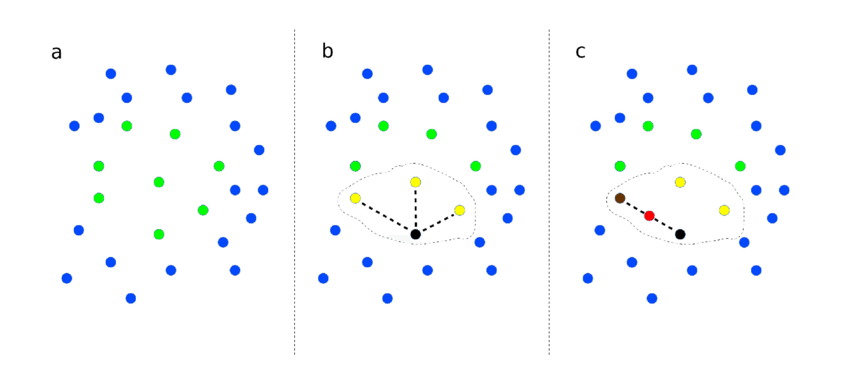

In [9]:
Image(filename="images/smote.png", width=950,height=500)

In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import matplotlib.pyplot as plt

#### Generating Dataset

In [ ]:
# Generate an imbalance data set using sklearn with 3:100 class distribution
X, y = make_classification(n_samples=10000, n_features=20, n_redundant=0,
n_clusters_per_class = 1, weights=[0.97], flip_y=0, random_state=1)

#### Plotting the generated dataset

<Axes: xlabel='Class', ylabel='count'>

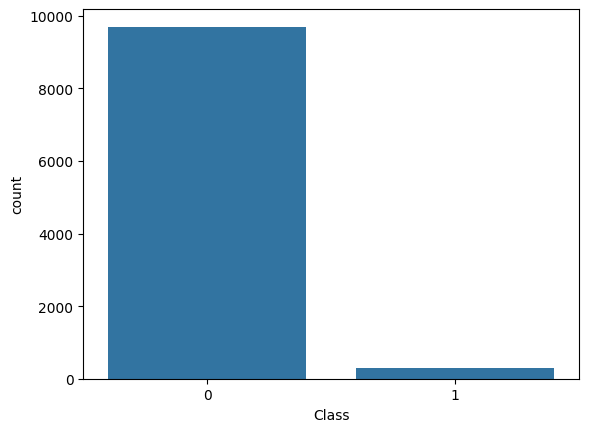

In [ ]:
import seaborn as sns
import pandas as pd
# Let's plot the imbalance data
sns.countplot(x = "Class", data = pd.DataFrame(y, columns = ['Class']))

#### Apply SMOTE

In [ ]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

#### Plot the Dataset After SMOTE

<Axes: xlabel='Class', ylabel='count'>

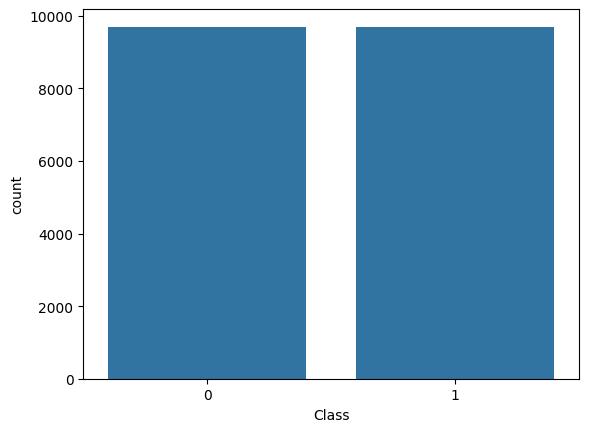

In [ ]:
sns.countplot(x = "Class", data = pd.DataFrame(y_resampled, columns = ['Class']))

# Outline The Model

In [ ]:
features_num = 20
output_size = 1
hidden_layer_size = 10

model = tf.keras.Sequential([
                            tf.keras.layers.Input(shape=(features_num,)),
                            tf.keras.layers.BatchNormalization(),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(output_size, activation='sigmoid')
                            ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Create Validation Dataset

In [ ]:
X_valid, y_valid = make_classification(n_samples=10000, n_features=20, n_redundant=0,
n_clusters_per_class=1, flip_y=0, random_state=1)

#### Fit the models

In [ ]:
history = model.fit(x = X, y = y, epochs=5, validation_data=(X_valid, y_valid))

history_smt = model.fit(x = X_resampled, y = y_resampled, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
313/313 [==============================] - 3s 5ms/step - loss: 0.5644 - accuracy: 0.7095 - val_loss: 0.8811 - val_accuracy: 0.5104
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 0.1421 - accuracy: 0.9699 - val_loss: 1.0722 - val_accuracy: 0.5064
Epoch 3/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0985 - accuracy: 0.9704 - val_loss: 0.9883 - val_accuracy: 0.5322
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0821 - accuracy: 0.9725 - val_loss: 0.8739 - val_accuracy: 0.6216
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0724 - accuracy: 0.9776 - val_loss: 0.7345 - val_accuracy: 0.7111
Epoch 1/5
607/607 [==============================] - 2s 3ms/step - loss: 0.2798 - accuracy: 0.8911 - val_loss: 0.2782 - val_accuracy: 0.8884
Epoch 2/5
607/607 [==============================] - 2s 3ms/step - loss: 0.2088 - accuracy: 0.9175 - val_loss: 0.2799 - val_accuracy: 0.8898
Epoch 3/5
607

#### Comparing on Plot

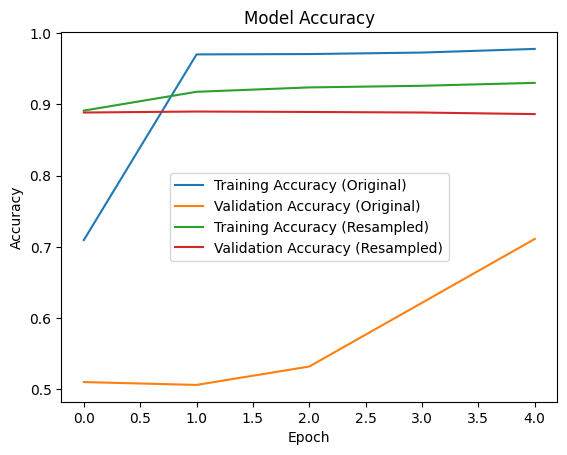

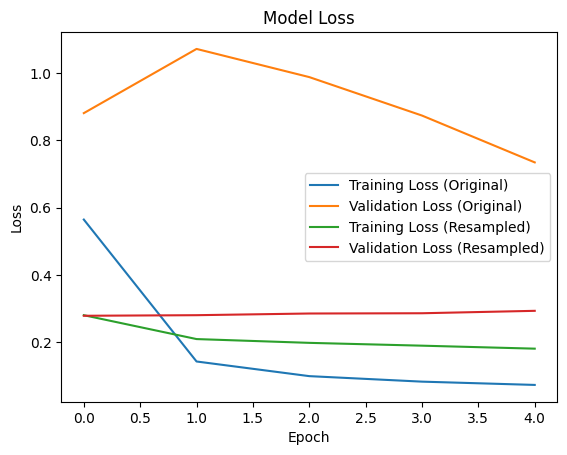

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy (Original)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Original)')
plt.plot(history_smt.history['accuracy'], label='Training Accuracy (Resampled)')
plt.plot(history_smt.history['val_accuracy'], label='Validation Accuracy (Resampled)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss (Original)')
plt.plot(history.history['val_loss'], label='Validation Loss (Original)')
plt.plot(history_smt.history['loss'], label='Training Loss (Resampled)')
plt.plot(history_smt.history['val_loss'], label='Validation Loss (Resampled)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Deep Neural Network for Multi-Class Classification

In this project, we'll leverage the concepts covered in our lectures to develop a deep neural network.

The dataset comprises approximately 111,000 samples, each with 92 features.

Our objective is to devise an algorithm capable of accurately predicting the target variable. Given that the target variable has only three possible classes (0, 1, 2), this represents a multi-class classification problem.

We aim to construct a neural network featuring two hidden layers. Throughout the project, we'll explore the impact of different optimizers and preprocessing methods, such as SMOTE, on the model's accuracy.

## Import the relevant packages

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import keras
from keras import callbacks

## Data

That's where we load and preprocess our data.

What has been done in the prepocessing:

1- <b>Cleaning the dataset</b> : The dataset has some empty columns. They can cause errors in training the model.

2- <b>Shuffle the dataset </b>: Data shuffling is an integral preprocessing technique frequently employed to improve model learning. Data shuffling is designed to counter potential issues arising from patterns in the sequential order of training samples, which can lead to overfitting

3- <b>Scaling the features </b>

4- <b>Balancing </b>: We've already metioned the disadvantages of imbalanced dataset. By using SMOTE technique we balance the dataset which has eqaul number of smaple for each class.

5- <b>Spliting the data </b>: The shuffled and balanced data splits into 3 parts for training (80%) , validation (10%) and testing (10%)



#### Load Dataset

In [ ]:
df = pd.read_csv( '/content/drive/MyDrive/Class notebook/Assignment 1-Dataset.csv'
)


#### Cleaning: Dropping empty columns

In [ ]:

y_train = df['Target']

# Drop empty columns
df = df.dropna(axis=1, how='all')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111304 entries, 0 to 111303
Data columns (total 93 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   F1      111304 non-null  int64  
 1   F2      111304 non-null  int64  
 2   F3      111304 non-null  int64  
 3   F4      111304 non-null  int64  
 4   F5      111304 non-null  int64  
 5   F6      111304 non-null  int64  
 6   F7      111304 non-null  int64  
 7   F8      111304 non-null  int64  
 8   F9      111304 non-null  int64  
 9   F10     111304 non-null  int64  
 10  F11     111304 non-null  int64  
 11  F12     111304 non-null  int64  
 12  F13     111304 non-null  int64  
 13  F14     111304 non-null  float64
 14  F15     111304 non-null  int64  
 15  F16     111304 non-null  int64  
 16  F17     111304 non-null  int64  
 17  F18     111304 non-null  int64  
 18  F19     111304 non-null  float64
 19  F20     111304 non-null  int64  
 20  F21     111304 non-null  int64  
 21  F22     11

#### Scaling the features

In [ ]:
dataset_scaler = StandardScaler()
dataset_scaler.fit(df)
scaled_X = dataset_scaler.transform(df)
scaled_X_DF = pd.DataFrame(scaled_X, columns= df.columns)


#### SMOTE

In [ ]:
smote = SMOTE()
x_train_smote , y_train_smote = smote.fit_resample(scaled_X_DF.iloc[:, :-1],y_train)

#### Split the dataset and Shuffling

In [ ]:
train_data, validation_data, train_targets, validation_targets = train_test_split(x_train_smote, y_train_smote, test_size = 0.1, random_state = 12)
train_data, x_test , train_targets, y_test = train_test_split(train_data, train_targets, test_size = 0.05, random_state = 12)

In [ ]:
print(validation_targets)
print(train_targets)

21944     0
111352    1
126528    1
31477     0
85464     2
         ..
160269    2
123738    1
157998    2
141735    1
34696     0
Name: Target, Length: 17164, dtype: int64
88237     2
132821    1
36311     0
133077    1
49507     0
         ..
99783     0
167070    2
62497     0
51499     0
16751     0
Name: Target, Length: 146751, dtype: int64


### Outline the model

In [ ]:
hidden_layer_size = 32
output_size = 3
feature_numbers = df.shape[1] - 1

model_adagrad = tf.keras.Sequential([
    tf.keras.layers.Dense(feature_numbers, activation='relu', input_shape=[train_data.shape[1]]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(output_size, activation='softmax')
])


### Choose the optimizer and the loss function

In [ ]:
Adagrad = tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    epsilon=1e-07,
    name="adagrad"
)

model_adagrad.compile(optimizer=Adagrad , loss="categorical_crossentropy" , metrics=['accuracy'], run_eagerly=True)

In [ ]:
y_saved = y_test

In [ ]:
train_targets = keras.utils.to_categorical(train_targets)
validation_targets = keras.utils.to_categorical(validation_targets)
y_test = keras.utils.to_categorical(y_test)

#### Fit the model

In [ ]:
history_adagrad = model_adagrad.fit(train_data, train_targets,batch_size = 1500,epochs = 3,validation_data = (validation_data, validation_targets))

Epoch 1/3
98/98 [==============================] - 13s 131ms/step - loss: 1.0356 - accuracy: 0.5117 - val_loss: 0.9316 - val_accuracy: 0.5650
Epoch 2/3
98/98 [==============================] - 11s 109ms/step - loss: 1.0068 - accuracy: 0.5250 - val_loss: 0.9086 - val_accuracy: 0.5722
Epoch 3/3
98/98 [==============================] - 9s 97ms/step - loss: 0.9842 - accuracy: 0.5369 - val_loss: 0.8910 - val_accuracy: 0.5792


### Test the Model

In [ ]:
y_saved = keras.utils.to_categorical(y_saved)
Loss_adegrad ,Accuracy_adegrad = model_adagrad.evaluate(x_test, y_saved)

242/242 [==============================] - 6s 27ms/step - loss: 0.8827 - accuracy: 0.5776


### Plot Loss and Accuracy over epochs

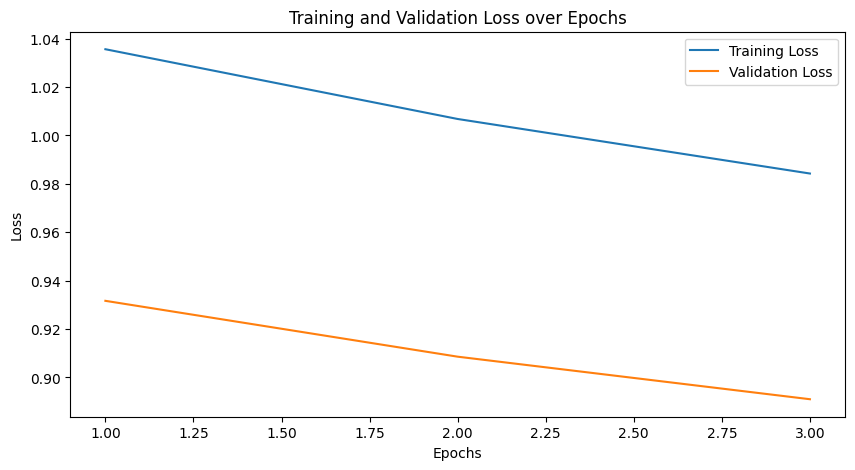

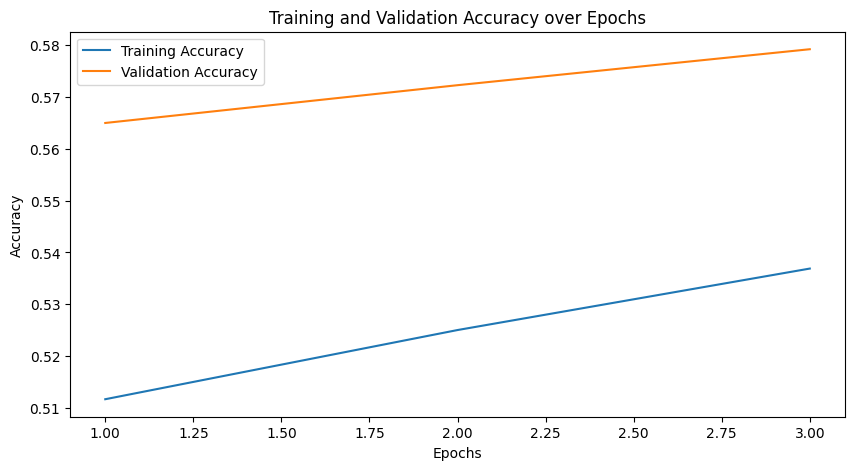

In [ ]:
train_loss = history_adagrad.history['loss']
val_loss = history_adagrad.history['val_loss']
train_accuracy = history_adagrad.history['accuracy']
val_accuracy = history_adagrad.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plotting loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **RMSprop**
Now here we want to do the last part but with RMSprop as an optimizer.

In [ ]:
hidden_layer_size = 32
output_size = 3
feature_numbers = df.shape[1] - 1

model_rms = tf.keras.Sequential([
    tf.keras.layers.Dense(feature_numbers, activation='relu', input_shape=[train_data.shape[1]]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

#### Setting the Optimizer and Compiling the model

In [ ]:
RMSProp = keras.optimizers.RMSprop (
    learning_rate=0.001,
    epsilon=1e-07,
    rho = 0.98,
    name="RMSprop"
)

# Here we should compile tho model that we have built with adagrad
model_rms.compile(optimizer=RMSProp , loss="categorical_crossentropy" , metrics=['accuracy'], run_eagerly=True)

#### Fit the model

In [ ]:
history_rms = model_rms.fit(train_data, train_targets,batch_size = 1500,epochs = 3,validation_data = (validation_data, validation_targets))

Epoch 1/3
98/98 [==============================] - 16s 163ms/step - loss: 0.6969 - accuracy: 0.6713 - val_loss: 0.6704 - val_accuracy: 0.6851
Epoch 2/3
98/98 [==============================] - 11s 112ms/step - loss: 0.6886 - accuracy: 0.6758 - val_loss: 0.6599 - val_accuracy: 0.6959
Epoch 3/3
98/98 [==============================] - 11s 109ms/step - loss: 0.6799 - accuracy: 0.6799 - val_loss: 0.6557 - val_accuracy: 0.6987


### Test the model

In [ ]:
rms_adegrad ,rms_adegrad = model_rms.evaluate(x_test, y_saved)

242/242 [==============================] - 5s 23ms/step - loss: 0.6464 - accuracy: 0.7025


### Plot Loss and Accuracy over epochs

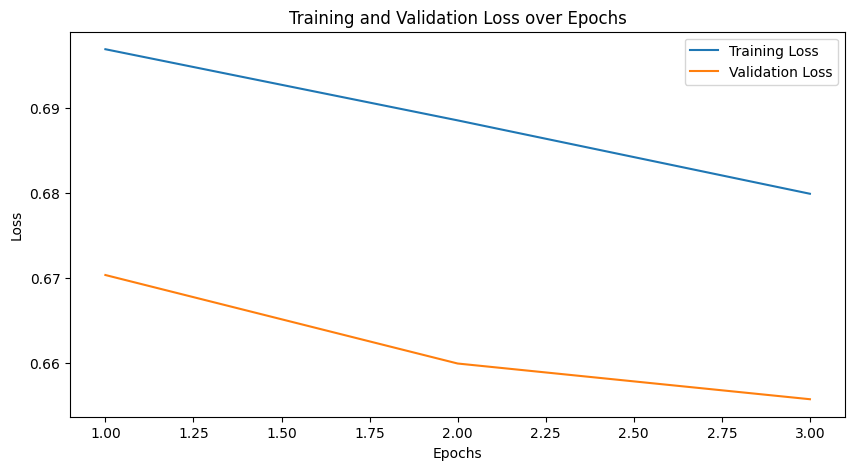

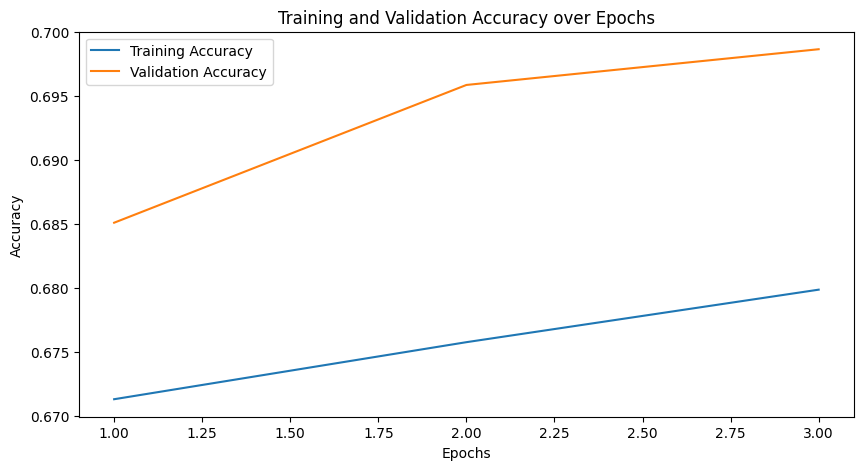

In [ ]:
train_loss = history_rms.history['loss']
val_loss = history_rms.history['val_loss']
train_accuracy = history_rms.history['accuracy']
val_accuracy = history_rms.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plotting loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Summery

As we saw the accuaracy and the speed of optimizing of the model with RMSprop is much better than AdaGrad